### MatPlotLib Revision

# MatplotLib Revision

## A More Advanced API

For more complicated plots, such as:-
1. Multiple subplots on 1 figure.
2. Conveniently adding text to photos
3. Creating animations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Single axes in one Figure

Text(0, 0.5, 'Time[s]')

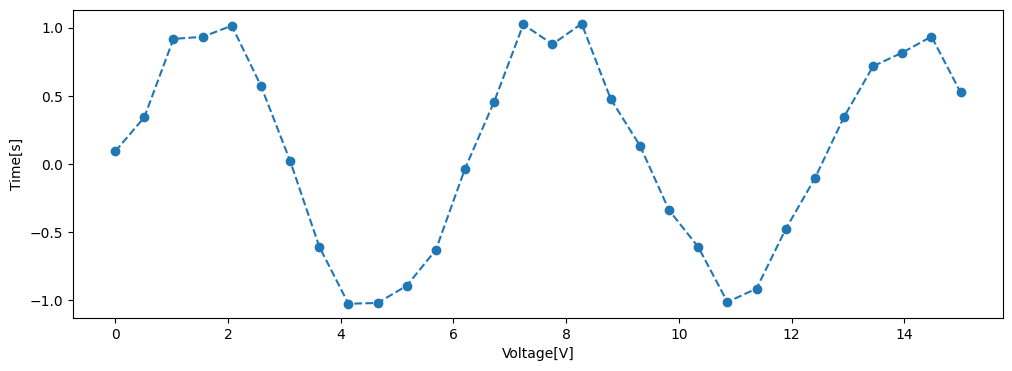

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.09*np.random.randn(len(x))
ax.plot(x, y, '--o')
ax.set_xlabel('Voltage[V]')
ax.set_ylabel('Time[s]')

Multiple Axes in one plot

Text(0.5, -0.04, 'Change in voltage [V]')

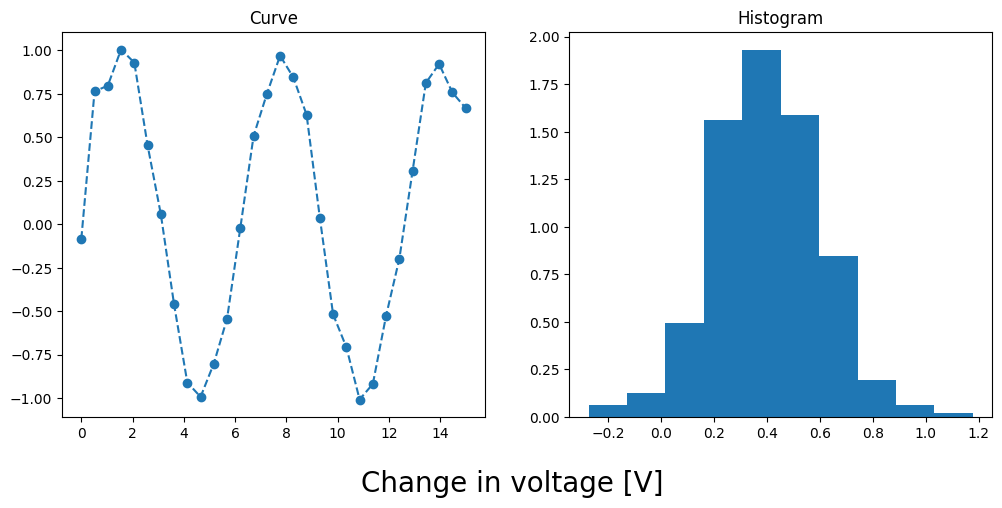

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax = axes[0]
ax.set_title("Curve")
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.09*np.random.randn(len(x))
ax.plot(x, y, '--o')

res = np.random.randn(1000)*0.2 + 0.4
ax = axes[1]
ax.set_title("Histogram")
ax.hist(res, density=True)
fig.text(0.5, -0.04, "Change in voltage [V]", ha='center', fontsize=20)

Scatter Plots

Text(0.5, -0.04, 'Change in voltage [V]')

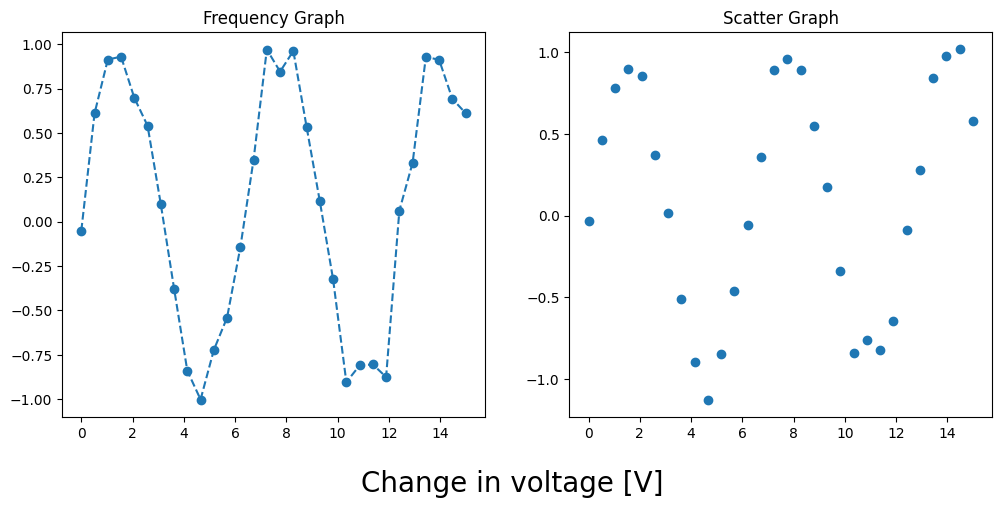

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax = axes[0]
ax.set_title('Frequency Graph')
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.09*np.random.randn(len(x))
ax.plot(x, y, '--o')

ax = axes[1]
ax.set_title('Scatter Graph')
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.09*np.random.randn(len(x))
plt.scatter(x, y)
fig.text(0.5, -0.04, "Change in voltage [V]", ha='center', fontsize=20)

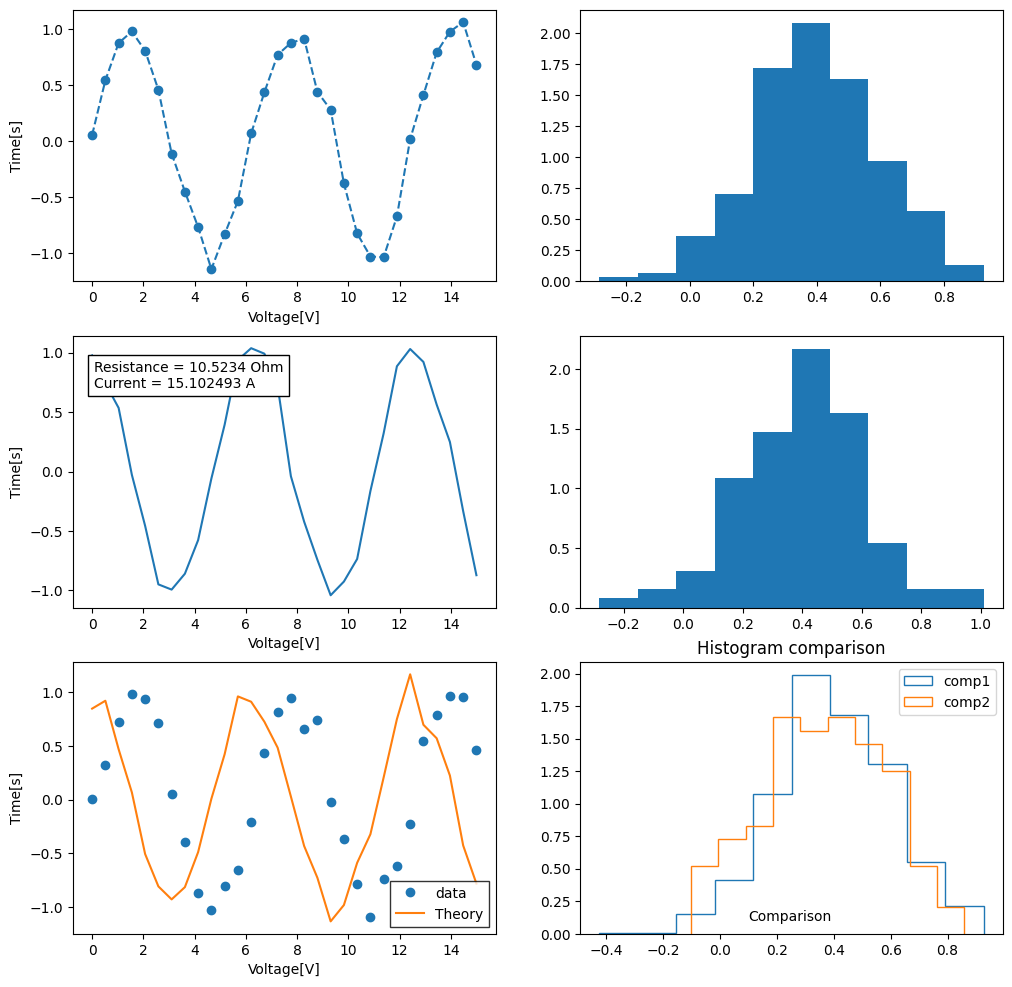

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
ax = axes[0][0]
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.09*np.random.randn(len(x))
ax.plot(x, y, 'o--')
ax.set_xlabel('Voltage[V]')
ax.set_ylabel('Time[s]')

ax = axes[1][0]
x = np.linspace(0, 15, 30)
y = np.cos(x) + 0.09*np.random.randn(len(x))
ax.plot(x, y)
ax.text(0.05, 0.81, "Resistance = 10.5234 Ohm\nCurrent = 15.102493 A",
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_xlabel('Voltage[V]')
ax.set_ylabel('Time[s]')

ax = axes[2][0]
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.09*np.random.randn(len(x))
ax.plot(x, y, 'o', label="data")
ax.set_xlabel('Voltage[V]')
ax.set_ylabel('Time[s]')

x = np.linspace(0, 15, 30)
y = np.cos(x) + 0.09*np.random.randn(len(x))
ax.plot(x, y, label="Theory")
ax.set_xlabel('Voltage[V]')
ax.set_ylabel('Time[s]')
ax.legend(fancybox=False, edgecolor='black')


res = np.random.randn(1000)*0.2 + 0.4
ax = axes[0][1]
ax.hist(res, density=True)

res2 = np.random.randn(100)*0.2 + 0.4
ax = axes[1][1]
ax.hist(res2, density=True)

ax = axes[2][1]
ax.text(0.1, 0.1, "Comparison")
ax.set_title("Histogram comparison")
res = np.random.randn(1000)*0.2 + 0.4
ax.hist(res, density=True, histtype='step', label="comp1")

res2 = np.random.randn(100)*0.2 + 0.4
ax.hist(res2, density=True, histtype='step', label="comp2")
ax.legend(loc='upper right')


### 2D Contour Plots

In [6]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x**2+x*y

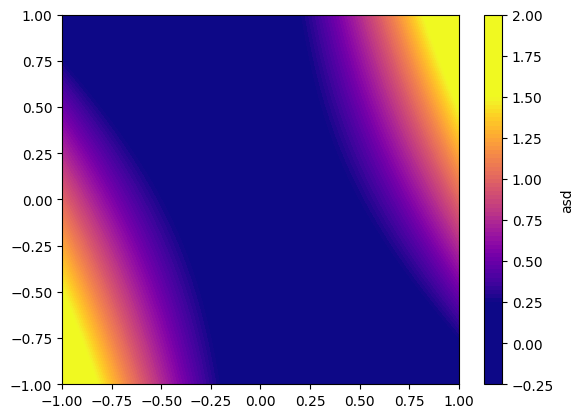

In [7]:
plt.contourf(x, y, z, levels=100, vmin=0.25, vmax=1.50, cmap="plasma")
plt.colorbar(label='asd')
# find the rest of the colour maps on google

<a list of 28 text.Text objects>

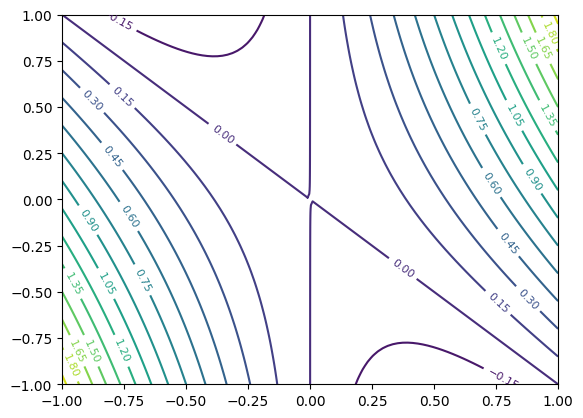

In [8]:
cs = plt.contour(x, y, z, levels=20)
plt.clabel(cs, fontsize=8)

### 3D surface plot

Not the best option

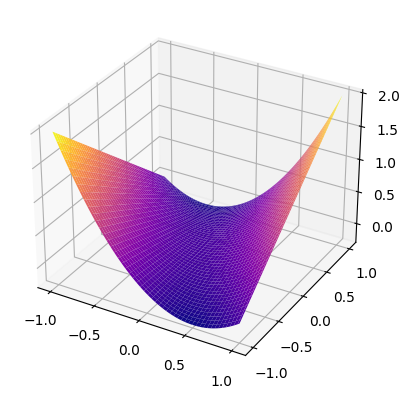

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap="plasma")

### StreamPlots

For vector Fields

In [10]:
w = 3
_ = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(_, _)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2+V**2)

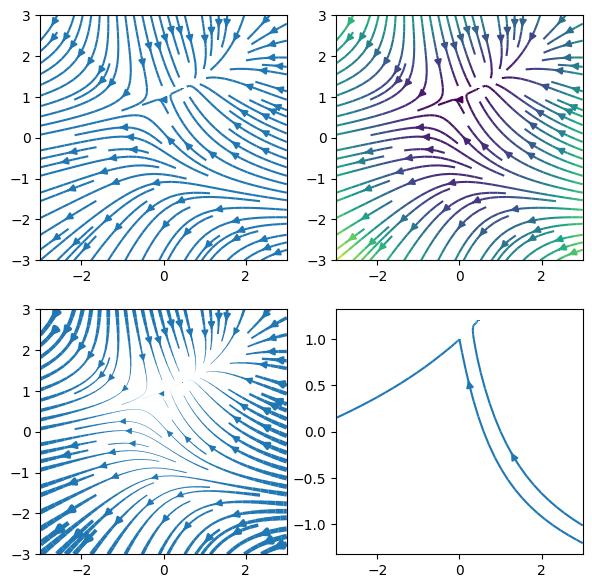

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
ax = axes[0][0]
ax.streamplot(X, Y, U, V)
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color=speed)
ax = axes[1][0]
lw = 5*speed/speed.max()
ax.streamplot(X, Y, U, V, linewidth=lw)
ax = axes[1][1]
lw = 5*speed/speed.max()
seedpoints=np.array([[0, 1], [1, 0]])
ax.streamplot(X, Y, U, V, start_points=seedpoints)

### Image Reading

In [12]:
im = plt.imread(r"C:\Users\rishi\Desktop\Programming\Apple.png")

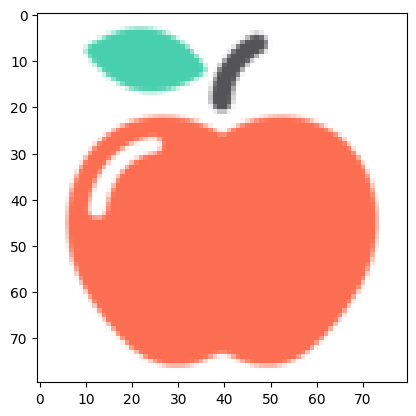

In [13]:
plt.imshow(im)

### Animations

In [14]:
def f(x, t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)
t = np.arange(0, 24, 1/60)
X, T = np.meshgrid(x, t)
F = f(X, T)

In [15]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

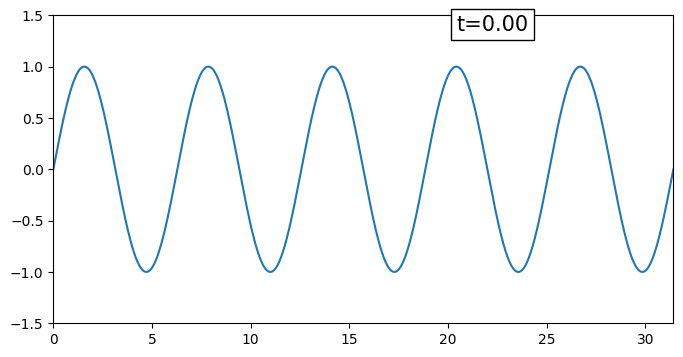

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, F[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('images/ani.gif',writer='pillow',fps=50,dpi=100)

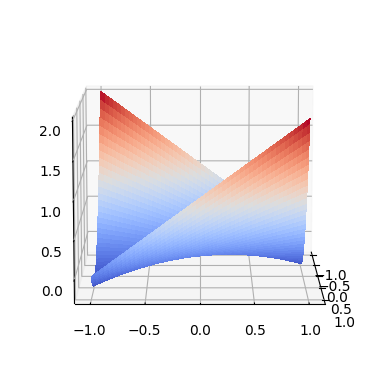

In [17]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=0)

def animate(i):
    ax.view_init(elev=10, azim=3*i)
    
ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('images/ani2.gif',writer='pillow',fps=30,dpi=100)

### Quantum Mechanics Related Plots


$\Psi = \frac{1}{81}(\frac{1}{2\pi a^3_0})^{\frac{1}{2}}(\frac{\sigma^2}{a_0})e^{\frac{-\sigma}{3a_0}}sin\theta cos\theta sin\phi$

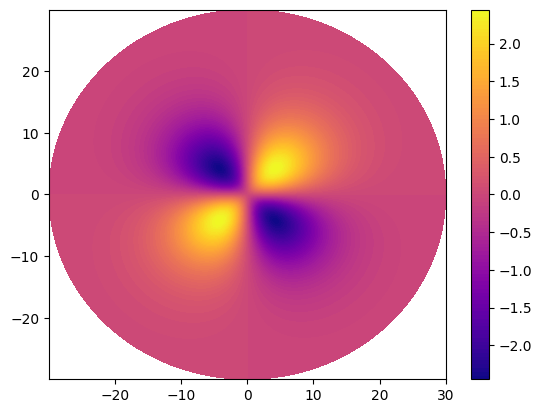

In [18]:
r = np.linspace(0, 30, 100)
p = np.linspace(0, 2*np.pi, 100)
r, p = np.meshgrid(r, p)
z = (r**2)*np.exp(-r/3)*np.sin(p)*np.cos(p)

X, Y = r*np.cos(p), r*np.sin(p)

plt.contourf(X, Y, z, levels=100, cmap="plasma")
plt.colorbar()

## Animating 3D graphs